In [21]:

import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
# import tensorflow_addons as tfa
import os

In [64]:
import os
import yaml

import tensorflow as tf

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import LSTM, Dropout,Dense,RepeatVector,TimeDistributed,Input,BatchNormalization
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam as adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.models import load_model

In [184]:
data_path = "C:\\Users\INT004435\\Downloads\\Noise\\"

In [185]:
df_test_1 = pd.read_csv(data_path + "Road Merge Collision_Noise_faultduration_5_V6.csv")
lis = []
for i in range(1,17):
    if i/2 != 1:
        lis1 = [3]*250 #1 for noise #2 offset 
        lis.extend(lis1)
    else:
        lis2 = [0]*250
        lis.extend(lis2)
        
lis.pop()
df1['label'] = lis
    

In [321]:
df2 = pd.read_csv(data_path + "Road Merge Collision_Noise_faultduration_5_V6.csv")
lis = []
for i in range(1,17):
    if i/2 != 1:
        lis1 = [3]*250 #1 for noise #2 offset 
        lis.extend(lis1)
    else:
        lis2 = [0]*250
        lis.extend(lis2)
        
lis.pop()
df2['label'] = lis

In [187]:
df3 = pd.read_csv(data_path + "Urban City Traffic_StuckAt_faultduration_5_V2.csv")
lis = []
for i in range(1,17):
    if i/2 != 1:
        lis1 = [3]*250 #1 for noise #2 offset 
        lis.extend(lis1)
    else:
        lis2 = [0]*250
        lis.extend(lis2)
        
lis.pop()
df3['label'] = lis

In [323]:
df4 = pd.read_csv(data_path + "Urban City Traffic_StuckAt_faultduration_5_V6.csv")
lis = []
for i in range(1,17):
    if i/2 != 1:
        lis1 = [3]*250 #1 for noise #2 offset 
        lis.extend(lis1)
    else:
        lis2 = [0]*250
        lis.extend(lis2)
        
lis.pop()
df4['label'] = lis

In [189]:
df5 = pd.read_csv(data_path + "Road Merge Collision_StuckAt_faultduration_5_V2.csv")
lis = []
for i in range(1,17):
    if i/2 != 1:
        lis1 = [3]*250 #1 for noise #2 offset 
        lis.extend(lis1)
    else:
        lis2 = [0]*250
        lis.extend(lis2)
        
lis.pop()
df5['label'] = lis

In [324]:

#df_stuckat = pd.concat([df2, df4])
#df_stuckat.info()
#df_stuckat['label'].unique()
#df_noise
#df_stuckat
#df_offset
#df_faultfree

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7998 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         7998 non-null   float64
 1   Speed        7998 non-null   float64
 2   Rotation     7998 non-null   float64
 3   Position     7998 non-null   float64
 4   Translation  7998 non-null   float64
 5   label        7998 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 437.4 KB


array([3, 0], dtype=int64)

In [409]:
df = pd.concat([df_noise, df_stuckat])
#df = df_noise
df.info()
df['label'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27993 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         27993 non-null  float64
 1   Speed        27993 non-null  float64
 2   Rotation     27993 non-null  float64
 3   Position     27993 non-null  float64
 4   Translation  27993 non-null  float64
 5   label        27993 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.5 MB


array([1, 0, 3], dtype=int64)

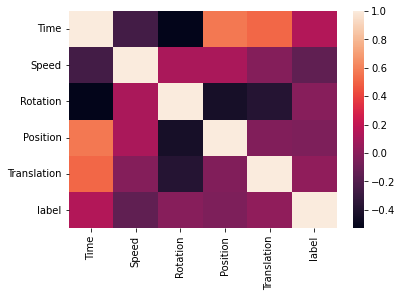

In [410]:
import seaborn as sns

sns.heatmap(df.corr())
plt.show()

In [281]:
# 2 Class Classification

"""
do this 6 files (noise)
for each files create labels

append all 6 dfs in one df

6*99 = ~ 600

"""

#df

'\ndo this 6 files (noise)\nfor each files create labels\n\nappend all 6 dfs in one df\n\n6*99 = ~ 600\n\n'

In [282]:
# 4 class classification
"""
Extend upper part for 3 faulty scenes
labels = [0,1,2,3]

cancat = df_noise + df_off +df_stuck
df = cancatenated file


"""


'\nExtend upper part for 3 faulty scenes\nlabels = [0,1,2,3]\n\ncancat = df_noise + df_off +df_stuck\ndf = cancatenated file\n\n\n'

In [411]:
y = df['label']
X = df['Speed']

In [412]:
# # Scaling the Data

from sklearn.preprocessing import RobustScaler
X = X.values.reshape(-1,1) #since considering just one parameter, i reshape it to (-1,1)
scaler = RobustScaler()

x = scaler.fit_transform(X)


In [413]:
n_features = 1

In [414]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X[i:(i + time_steps)]
        # print(v.shape)
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 64
STEP = 40

print(X.shape)
X_train, y_train = create_dataset(
    x, 
    y, 
    TIME_STEPS, 
    STEP
)
print(X_train.shape)


(27993, 1)
(699, 64, 1)


In [415]:
print(y_train.shape)


(699, 1)


In [416]:
X_train = X_train.reshape(699,4,int(TIME_STEPS/4),n_features)

In [417]:
print(X_train.shape, y_train.shape)


(699, 4, 16, 1) (699, 1)


In [418]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
# y_test = enc.transform(y_test)

In [422]:
model = Sequential()

# Add dropout to reduce overfitting
model.add(TimeDistributed(Dropout(0.1)))

# The extracted features are then flattened and provided to the LSTM model to read
model.add(TimeDistributed(Flatten()))

# Add LSTM Model
model.add(LSTM(50))

# Use Dropout layer to reduce overfitting of the model to the training data
model.add(Dropout(0.2))

# Add one hidden layer with 100 default nodes with relu activation function
model.add(Dense(150, activation='relu'))

# Add output layer with 6 (Total number of classes) nodes with softmax activation function
model.add(Dense(3, activation='softmax')) 

In [423]:
def plot_training(history):
    print(history.history.keys())

    #  "Accuracy"
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

Epoch 1/20
9/9 [==============================] - 3s 78ms/step - loss: 1.0270 - accuracy: 0.8050 - val_loss: 1.1934 - val_accuracy: 0.0000e+00
Epoch 2/20
9/9 [==============================] - 0s 9ms/step - loss: 0.9911 - accuracy: 0.8354 - val_loss: 1.2421 - val_accuracy: 0.0000e+00
Epoch 3/20
9/9 [==============================] - 0s 10ms/step - loss: 0.9614 - accuracy: 0.8408 - val_loss: 1.2937 - val_accuracy: 0.0000e+00
Epoch 4/20
9/9 [==============================] - 0s 10ms/step - loss: 0.9299 - accuracy: 0.8408 - val_loss: 1.3514 - val_accuracy: 0.0000e+00
Epoch 5/20
9/9 [==============================] - 0s 14ms/step - loss: 0.9010 - accuracy: 0.8408 - val_loss: 1.4160 - val_accuracy: 0.0000e+00
Epoch 6/20
9/9 [==============================] - 0s 12ms/step - loss: 0.8742 - accuracy: 0.8408 - val_loss: 1.4908 - val_accuracy: 0.0000e+00
Epoch 7/20
9/9 [==============================] - 0s 8ms/step - loss: 0.8478 - accuracy: 0.8408 - val_loss: 1.5748 - val_accuracy: 0.0000e+00
E

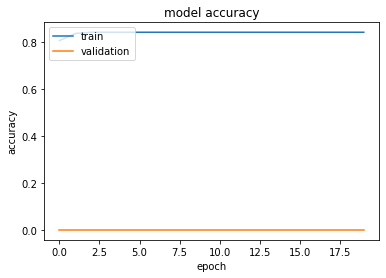

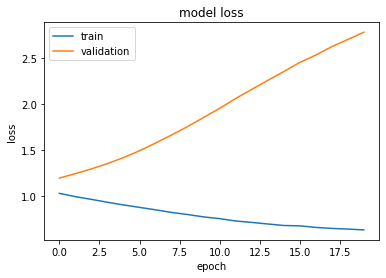

In [424]:
def training(model, X_train, y_train):
    # Another control put in place to handle overfitting
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',verbose=1,patience=20,mode='min',restore_best_weights=True)

    opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)

    # compile the model and start Training
 
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy']) 

    history = model.fit(X_train, y_train,epochs=20,batch_size=64,validation_split=0.2,shuffle=True,callbacks=[early_stopping])
    print(history.history.keys())
    # plot training performance over the epochs
    plot_training(history)
    return history

history= training(model, X_train, y_train)

In [402]:
import datetime
model.save("Mobatsim_model/noise"+f'{datetime.datetime.today().strftime("%d-%m-%Y")}.h5')

'2.8.0'